In [1]:
import sys
if not '..' in sys.path:
    sys.path.append('..')

In [79]:
from analysis import collection, analysis

from pathlib import Path

import numpy as np
from scipy.optimize import curve_fit
from analysis import analysis
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import LineCollection
from matplotlib.colors import to_rgba
from IPython.display import HTML

%matplotlib inline

image_path = Path("/Users/spencer/phd/phd/images/")

## Visualize ideal trial trajectory

- hitting the target isn't the maintenance of a particular force, it's rather the achievement of a particular force profile among muscles-- it's a "high dimensional button push"
- what's the "optimal" trajectory to reach that force profile? step? ramp? something in between? what is the function 
- what would make any function between (0,0) and target more or less optimal? based on what we know about the signal?


Miss


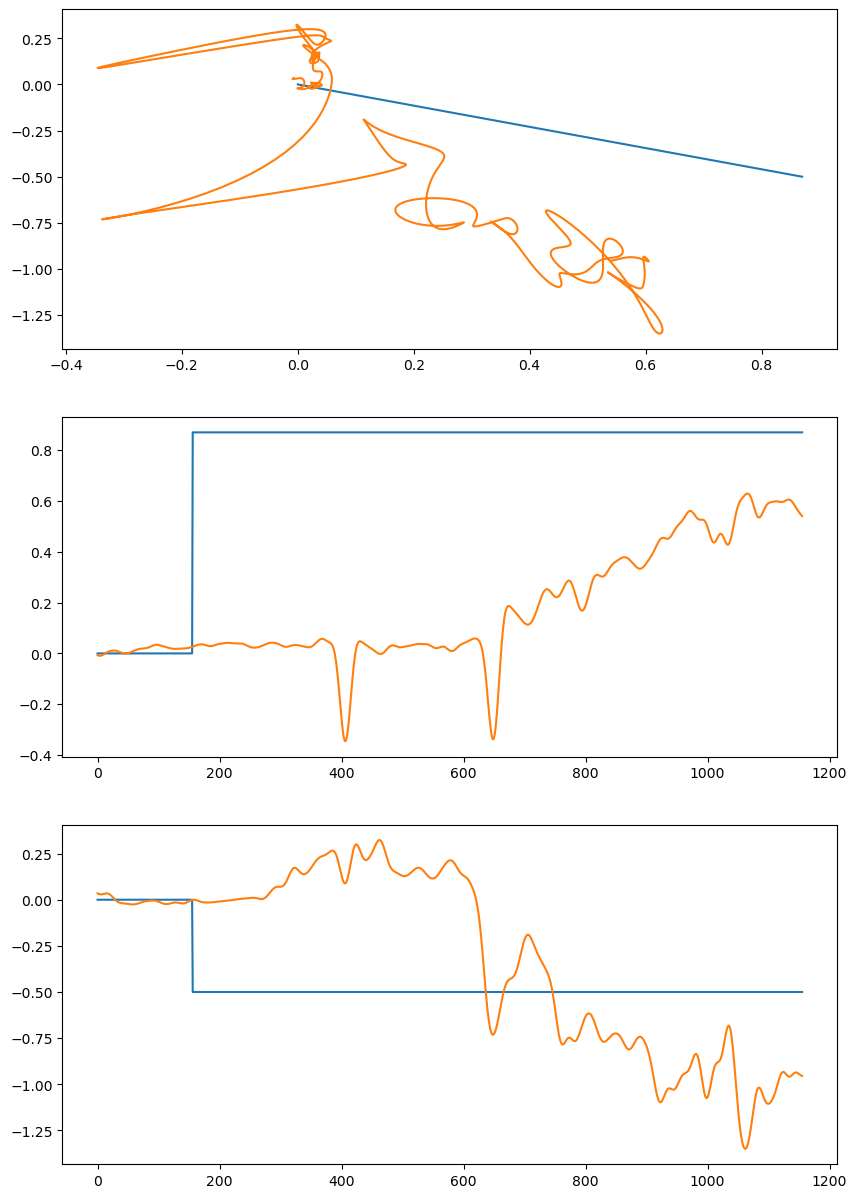

In [153]:
collection_name = "emg_olympics"
subject_name = "alba"
task_name = "center_hold"
session_name = "session_1"
subject_idx = 10
session_idx = 1
trial_idx = 5

# given a target
# in which direction should we go?

# hold period + movement period
c = collection.Collection(collection_name)
subjects = c.alphabetically_sorted_subjects()
sessions =  list(subjects[subject_idx].tasks[task_name].sorted_sessions())
trial = sessions[session_idx].sorted_trials()[trial_idx]

print(trial.outcome)
target = np.array(trial.target_coords)
trajectory = trial.get_trajectory()[:,-2:]
hold = np.zeros((2))
hold_steps = int(200*trial.hold_time)
hold_points = np.repeat(hold[:, np.newaxis], hold_steps, axis=1)

if trial.outcome == "Hit":
    movement_steps = int(200*trial.reach_time)
else:
    movement_steps = int(trajectory.shape[0]-hold_steps)

reach_points_step = np.repeat(target[:, np.newaxis], movement_steps, axis=1)
step_ideal = np.concatenate([hold_points, reach_points_step], axis=1).T

fig, axes = plt.subplots(3,1,figsize=(10,15))
axes[0].plot(step_ideal[:,0],step_ideal[:,1])
axes[1].plot(step_ideal[:,0])
axes[2].plot(step_ideal[:,1])

axes[0].plot(trajectory[:,0],trajectory[:,1])
axes[1].plot(trajectory[:,0])
axes[2].plot(trajectory[:,1])


## without the hold period 

Hit


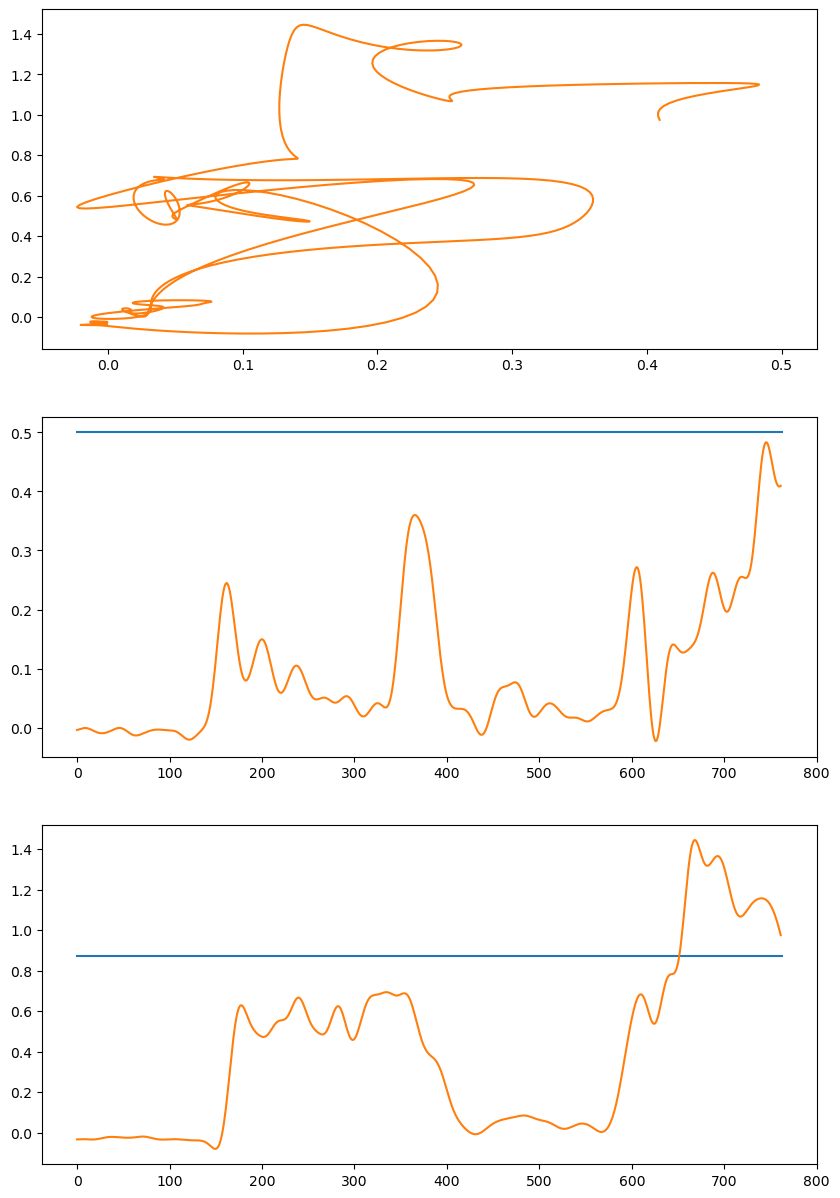

In [158]:
collection_name = "emg_olympics"
subject_name = "alba"
task_name = "center_hold"
session_name = "session_1"
subject_idx = 10
session_idx = 1
trial_idx = 8

# given a target
# in which direction should we go?

# hold period + movement period
c = collection.Collection(collection_name)
subjects = c.alphabetically_sorted_subjects()
sessions =  list(subjects[subject_idx].tasks[task_name].sorted_sessions())
trial = sessions[session_idx].sorted_trials()[trial_idx]

print(trial.outcome)
target = np.array(trial.target_coords)
hold = np.zeros((2))
hold_steps = int(200*trial.hold_time)
hold_points = np.repeat(hold[:, np.newaxis], hold_steps, axis=1)
trajectory = trial.get_trajectory()[hold_steps:,-2:]

if trial.outcome == "Hit":
    movement_steps = int(200*trial.reach_time)
else:
    movement_steps = int(trajectory.shape[0])

step_ideal = np.repeat(target[:, np.newaxis], movement_steps, axis=1).T

fig, axes = plt.subplots(3,1,figsize=(10,15))
axes[0].plot(step_ideal[:,0],step_ideal[:,1])
axes[1].plot(step_ideal[:,0])
axes[2].plot(step_ideal[:,1])

axes[0].plot(trajectory[:,0],trajectory[:,1])
axes[1].plot(trajectory[:,0])
axes[2].plot(trajectory[:,1])


## rotate all targets?

In [ ]:
def make_2d_rotation_matrix(angle):
    return np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

def rotate_2d_vec_to_origin(vec):
    # assume [x, y]
    assert vec.shape == (2,), vec.shape
    # the "closest" angle between the two vectors
    theta = np.arccos(np.dot(vec, [1,0])/(np.linalg.norm(vec)))
    R = make_2d_rotation_matrix(theta)
    # get the rotation direction correct
    if vec[1] > 0:
        return -R @ vec
    else:
        return R @ vec

rotate_2d_vec_to_origin(np.array(target))

array([ 8.32406151e-01, -9.87517879e-17])

In [ ]:
collection_name = "emg_olympics"
subject_name = "alba"
task_name = "center_hold"
session_name = "session_1"
subject_idx = 10
session_idx = 1
trial_idx = 8

# given a target
# in which direction should we go?

# hold period + movement period
c = collection.Collection(collection_name)
subjects = c.alphabetically_sorted_subjects()
sessions =  list(subjects[subject_idx].tasks[task_name].sorted_sessions())
trial = sessions[session_idx].sorted_trials()[trial_idx]

print(trial.outcome)
target = np.array(trial.target_coords)
hold = np.zeros((2))
hold_steps = int(200*trial.hold_time)
hold_points = np.repeat(hold[:, np.newaxis], hold_steps, axis=1)
trajectory = trial.get_trajectory()[hold_steps:,-2:]

if trial.outcome == "Hit":
    movement_steps = int(200*trial.reach_time)
else:
    movement_steps = int(trajectory.shape[0])

step_ideal = np.repeat(target[:, np.newaxis], movement_steps, axis=1).T

fig, axes = plt.subplots(3,1,figsize=(10,15))
axes[0].plot(step_ideal[:,0],step_ideal[:,1])
axes[1].plot(step_ideal[:,0])
axes[2].plot(step_ideal[:,1])

axes[0].plot(trajectory[:,0],trajectory[:,1])
axes[1].plot(trajectory[:,0])
axes[2].plot(trajectory[:,1])

## controllability

In [50]:
A = subjects[subject_idx].dynamics
D = subjects[subject_idx].decoder
N = A.shape[1]
W = D.copy()
for i in range(1,N):
    Apow = np.linalg.matrix_power(A, i)
    W = np.concatenate((W, Apow@D), axis=1)
print(W.shape)
print("rank of gramian: ", np.linalg.matrix_rank(W))
print("eigs of A: ", np.linalg.eig(A)[0])

(6, 384)
rank of gramian:  6
eigs of A:  [0. 0. 0. 0. 0. 0.]
